# Sedimentation Lab
Author: Martin Trulsson<br>
E-mail: martin.trulsson@teokem.lu.se

### Tips for Jupyter Notebooks
- Double click on a cell to edit it.
- Execute code in a cell by pressing `shift+return`.
- For getting help on a function, place the cursor inside the `()` brackets and press `shift+tab-tab`.
- More on text formatting, equations etc.
[here](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html).

In [1]:
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import rc
from pylab import *
from scipy import *
from scipy.optimize import leastsq
from scipy.optimize import fmin_slsqp
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.optimize import newton
import os.path, os, sys
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 6], 'legend.fancybox': True,
                     'xtick.major.size':6, 'ytick.major.size':6, 'figure.dpi':600,
                     'xtick.direction':'out','ytick.direction':'out'})
workdir=%pwd
print(workdir)

/Users/trulle/Undervisning/Doktorandkurs/2022/PlanSuspension/Labbar/Martin


0.0 -0.05305164769729845


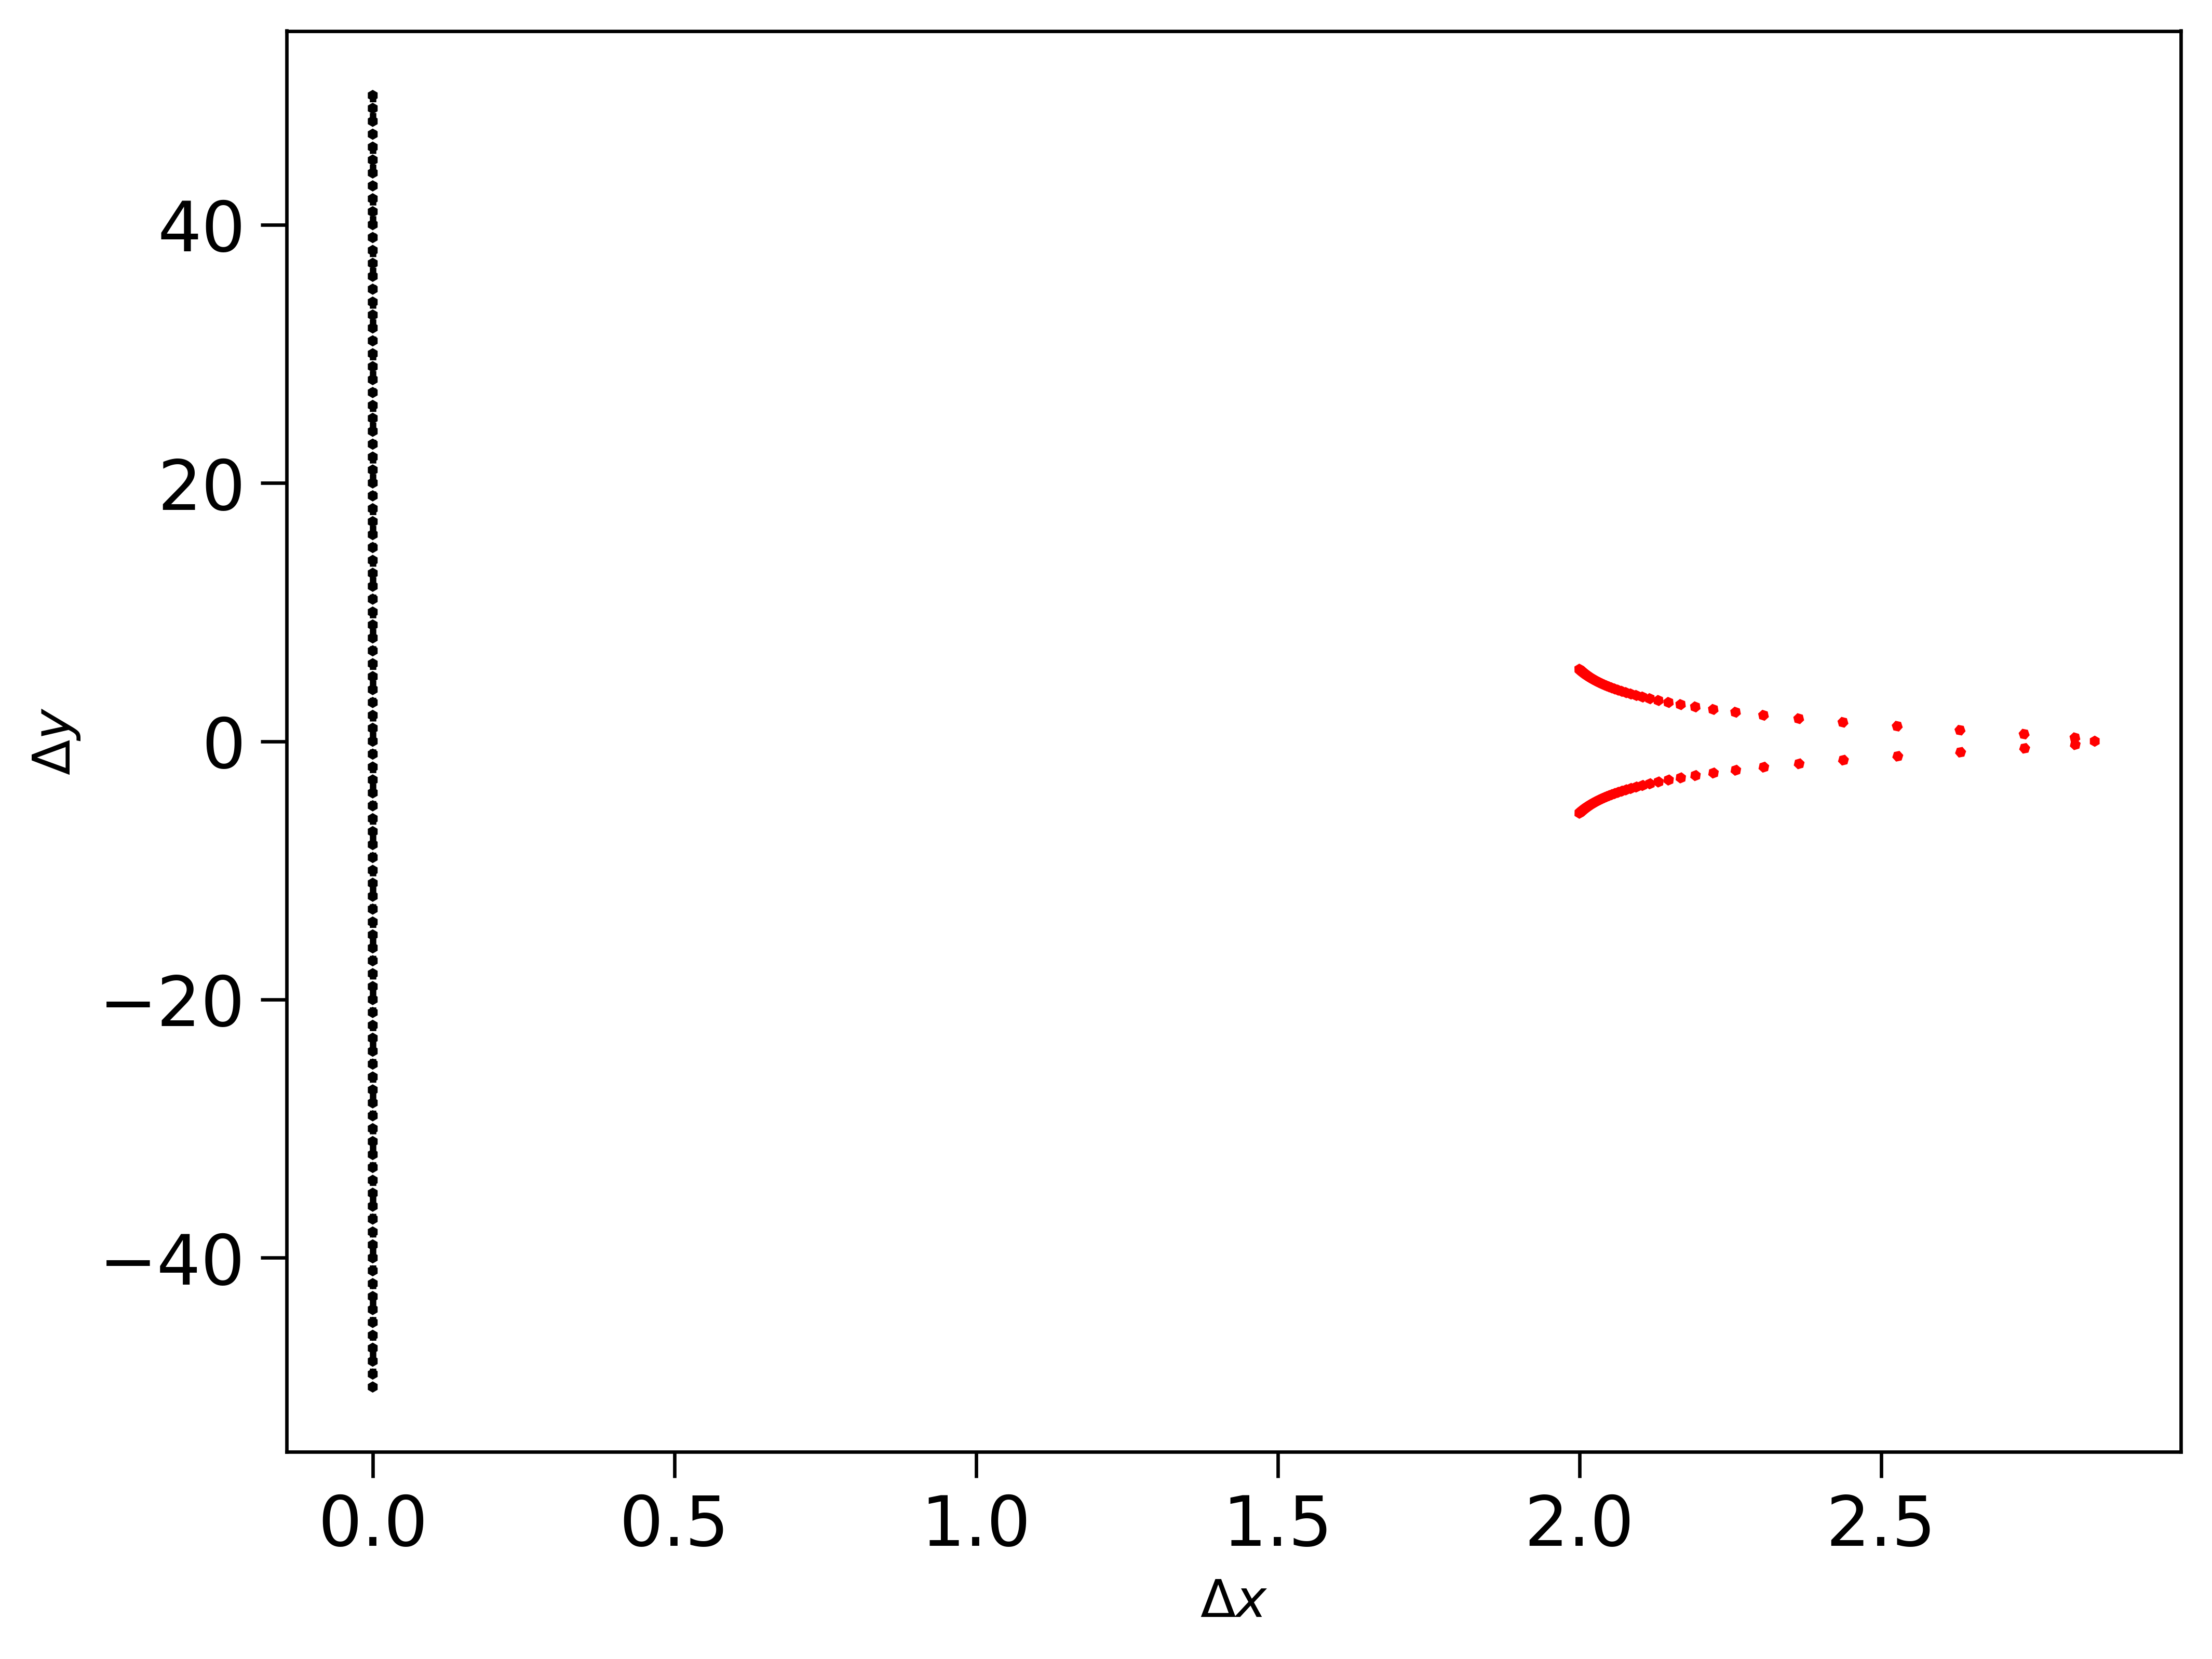

In [2]:
# Coordinates
x1 =[]
y1 =[]
x2 =[]
y2 =[]

# Starting coordinates
x1.append(0.) 
y1.append(50.)
x2.append(2.) 
#y2.append(0.)
y2.append(11.1430028571/2.) # Doesn't matter much, here I have symmetrised the trajectory around y=0


# Coordinates (isolated particles)
xS1 =[]
yS1 =[]
xS2 =[]
yS2 =[]

# Starting coordinates (isolated particles) = same as before
xS1.append(x1[0]) 
yS1.append(y1[0])
xS2.append(x2[0]) 
yS2.append(y2[0])


# Velocities
vx1 = []
vy1 = []
vx2 = []
vy2 = []

# Counter
i=0
# Viscosity
eta = 1.0
# Time step
iiter = 10000
#dt = 0.2
dt = 0.18849555921 # (from distanceS/iiter*6*pi*a1)
# Time counter
# Time = (Time counter)*(Time step)

2000

# Particle 1
F1x = 0.
F1y = -1.
a1 = 1.
p1a = 1./(6.*pi*eta*a1)

# Particle 2
F2x = 0.
F2y = -0.0
a2 = 1.
p2a = 1./(6.*pi*eta*a2)

# Off-diagonal element -> point-force (stokeslet)
pD = 1./(8.*pi*eta)

# Final coordinates of the isolated particles
xS1.append(xS1[0]+iiter*dt*F1x*p1a) 
yS1.append(yS1[0]+iiter*dt*F1y*p1a)
xS2.append(xS2[0]+iiter*dt*F2x*p2a) 
yS2.append(yS2[0]+iiter*dt*F2y*p2a)

for i in range(0,iiter):
   
    # Relative distance between particle 1 and 2 in x and y-directions
    dx12 = x2[i]-x1[i]
    dy12 = y2[i]-y1[i]
    r12 = np.sqrt(dx12*dx12+dy12*dy12)
    
    # Matrix element
    # xx,xy, and yy 
    ExxD12 = pD*(1.+(dx12*dx12/(r12*r12)))/r12
    ExyD12 = pD*(dx12*dy12/(r12*r12))/r12
    EyyD12 = pD*(1.+(dy12*dy12/(r12*r12)))/r12

    Exx1 = p1a
    Exy1 = 0.
    Eyy1 = p1a
    
    Exx2 = p2a
    Exy2 = 0.
    Eyy2 = p2a
    
    vx1a = (Exx1*F1x+Exy1*F1y)+(ExxD12*F2x+ExyD12*F2y)
    vy1a = (Eyy1*F1y+Exy1*F1x)+(EyyD12*F2y+ExyD12*F2x)

    vx2a = (Exx2*F2x+Exy2*F2y)+(ExxD12*F1x+ExyD12*F1y)
    vy2a = (Eyy2*F2y+Exy2*F2x)+(EyyD12*F1y+ExyD12*F1x)
    

    vx1.append(vx1a)
    vy1.append(vy1a)
    vx2.append(vx2a)
    vy2.append(vy2a)
    
    x1.append(x1[i]+vx1[i]*dt)
    y1.append(y1[i]+vy1[i]*dt)
    x2.append(x2[i]+vx2[i]*dt)
    y2.append(y2[i]+vy2[i]*dt)
    

i = iiter-1
vx1.append(vx1[i])
vy1.append(vy1[i])
vx2.append(vx2[i])
vy2.append(vy2[i])

x1 = np.asarray(x1)
y1 = np.asarray(y1)
vx1 = np.asarray(vx1)
vy1 = np.asarray(vy1)

x2 = np.asarray(x2)
y2 = np.asarray(y2)
vx2 = np.asarray(vx2)
vy2 = np.asarray(vy2)

# Scalar to rescale vectors (ss) and points each (ee)
ee = 100
ss = 10

plt.quiver(x1[::ee],y1[::ee],vx1[::ee],vy1[::ee],scale=ss)
plt.quiver(x2[::ee],y2[::ee],vx2[::ee],vy2[::ee],scale=ss,color='r')
plt.plot(xS1,yS1,ls=':',color='k')
plt.plot(xS2,yS2,ls=':',color='r')

#print "dy: ",y2[iiter-1]-y2[0]
print(vx1[0],vy1[0])
plt.xlabel(r"$\Delta x$",fontsize='12')
plt.ylabel(r"$\Delta y$",fontsize='12')

plt.subplots_adjust(left=0.20)
plt.subplots_adjust(right=0.96)
plt.subplots_adjust(bottom=0.14)
plt.subplots_adjust(top=0.90)
plt.savefig(workdir+'/Flow_sphere_lab_neutr.pdf')
plt.show()